<a href="https://colab.research.google.com/github/sapana-k/SET-Lab/blob/main/UsingXLSX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from datetime import datetime as dt

In [ ]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/hungary_chickenpox.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      522 non-null    datetime64[ns]
 1   BUDAPEST  522 non-null    int64         
 2   BARANYA   522 non-null    int64         
 3   BACS      522 non-null    int64         
 4   BEKES     522 non-null    int64         
 5   BORSOD    522 non-null    int64         
 6   CSONGRAD  522 non-null    int64         
 7   FEJER     522 non-null    int64         
 8   GYOR      522 non-null    int64         
 9   HAJDU     522 non-null    int64         
 10  HEVES     522 non-null    int64         
 11  JASZ      522 non-null    int64         
 12  KOMAROM   522 non-null    int64         
 13  NOGRAD    522 non-null    int64         
 14  PEST      522 non-null    int64         
 15  SOMOGY    522 non-null    int64         
 16  SZABOLCS  522 non-null    int64         
 17  TOLNA     522 no

In [ ]:
df

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,2005-01-03,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,2005-01-10,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,2005-01-17,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,2005-01-24,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,2005-01-31,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2014-12-01,95,12,41,6,39,0,16,15,14,...,56,7,13,122,4,23,4,11,110,10
518,2014-12-08,43,39,31,10,34,3,2,30,25,...,34,20,18,70,36,5,23,22,63,9
519,2014-12-15,35,7,15,0,0,0,7,7,4,...,30,36,4,72,5,21,14,0,17,10
520,2014-12-22,30,23,8,0,11,4,1,9,10,...,27,17,21,12,5,17,1,1,83,2


In [ ]:
df['Ordinal_Date'] = df['Date'].map(dt.toordinal)

In [ ]:
RegressionObject = linear_model.LinearRegression()
x = df[['Ordinal_Date']]
y = df.BUDAPEST
RegressionObject.fit(x, y)
date = '2008-01-01'
dtstr = dt.strptime(date, '%Y-%m-%d').date()
dtstr = pd.to_datetime(dtstr)
dtstr = dtstr.toordinal()
RegressionObject.predict([[dtstr]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([107.161832])

In [ ]:
print(RegressionObject.intercept_)

6044.371812946754


In [ ]:
print(RegressionObject.coef_)

[-0.00809941]


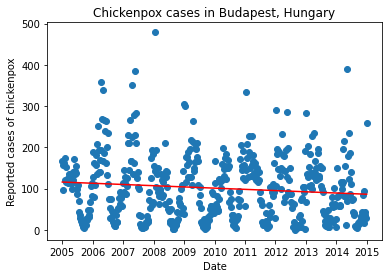

In [ ]:
%matplotlib inline
plt.scatter(df.Date, df.BUDAPEST)
plt.title('Chickenpox cases in Budapest, Hungary')
plt.xlabel('Date')
plt.ylabel('Reported cases of chickenpox')
plt.plot(df.Date, RegressionObject.predict(df[['Ordinal_Date']]), color = 'red')
plt.show()

In [ ]:
df

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,Ordinal_Date
0,2005-01-03,168,79,30,173,169,42,136,120,162,...,57,2,178,66,64,11,29,87,68,731949
1,2005-01-10,157,60,30,92,200,53,51,70,84,...,50,29,141,48,29,58,53,68,26,731956
2,2005-01-17,96,44,31,86,93,30,93,84,191,...,46,4,157,33,33,24,18,62,44,731963
3,2005-01-24,163,49,43,126,46,39,52,114,107,...,54,14,107,66,50,25,21,43,31,731970
4,2005-01-31,122,78,53,87,103,34,95,131,172,...,49,11,124,63,56,7,47,85,60,731977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2014-12-01,95,12,41,6,39,0,16,15,14,...,7,13,122,4,23,4,11,110,10,735568
518,2014-12-08,43,39,31,10,34,3,2,30,25,...,20,18,70,36,5,23,22,63,9,735575
519,2014-12-15,35,7,15,0,0,0,7,7,4,...,36,4,72,5,21,14,0,17,10,735582
520,2014-12-22,30,23,8,0,11,4,1,9,10,...,17,21,12,5,17,1,1,83,2,735589


In [ ]:
RegressionObject.predict([[735596]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86.47593093])